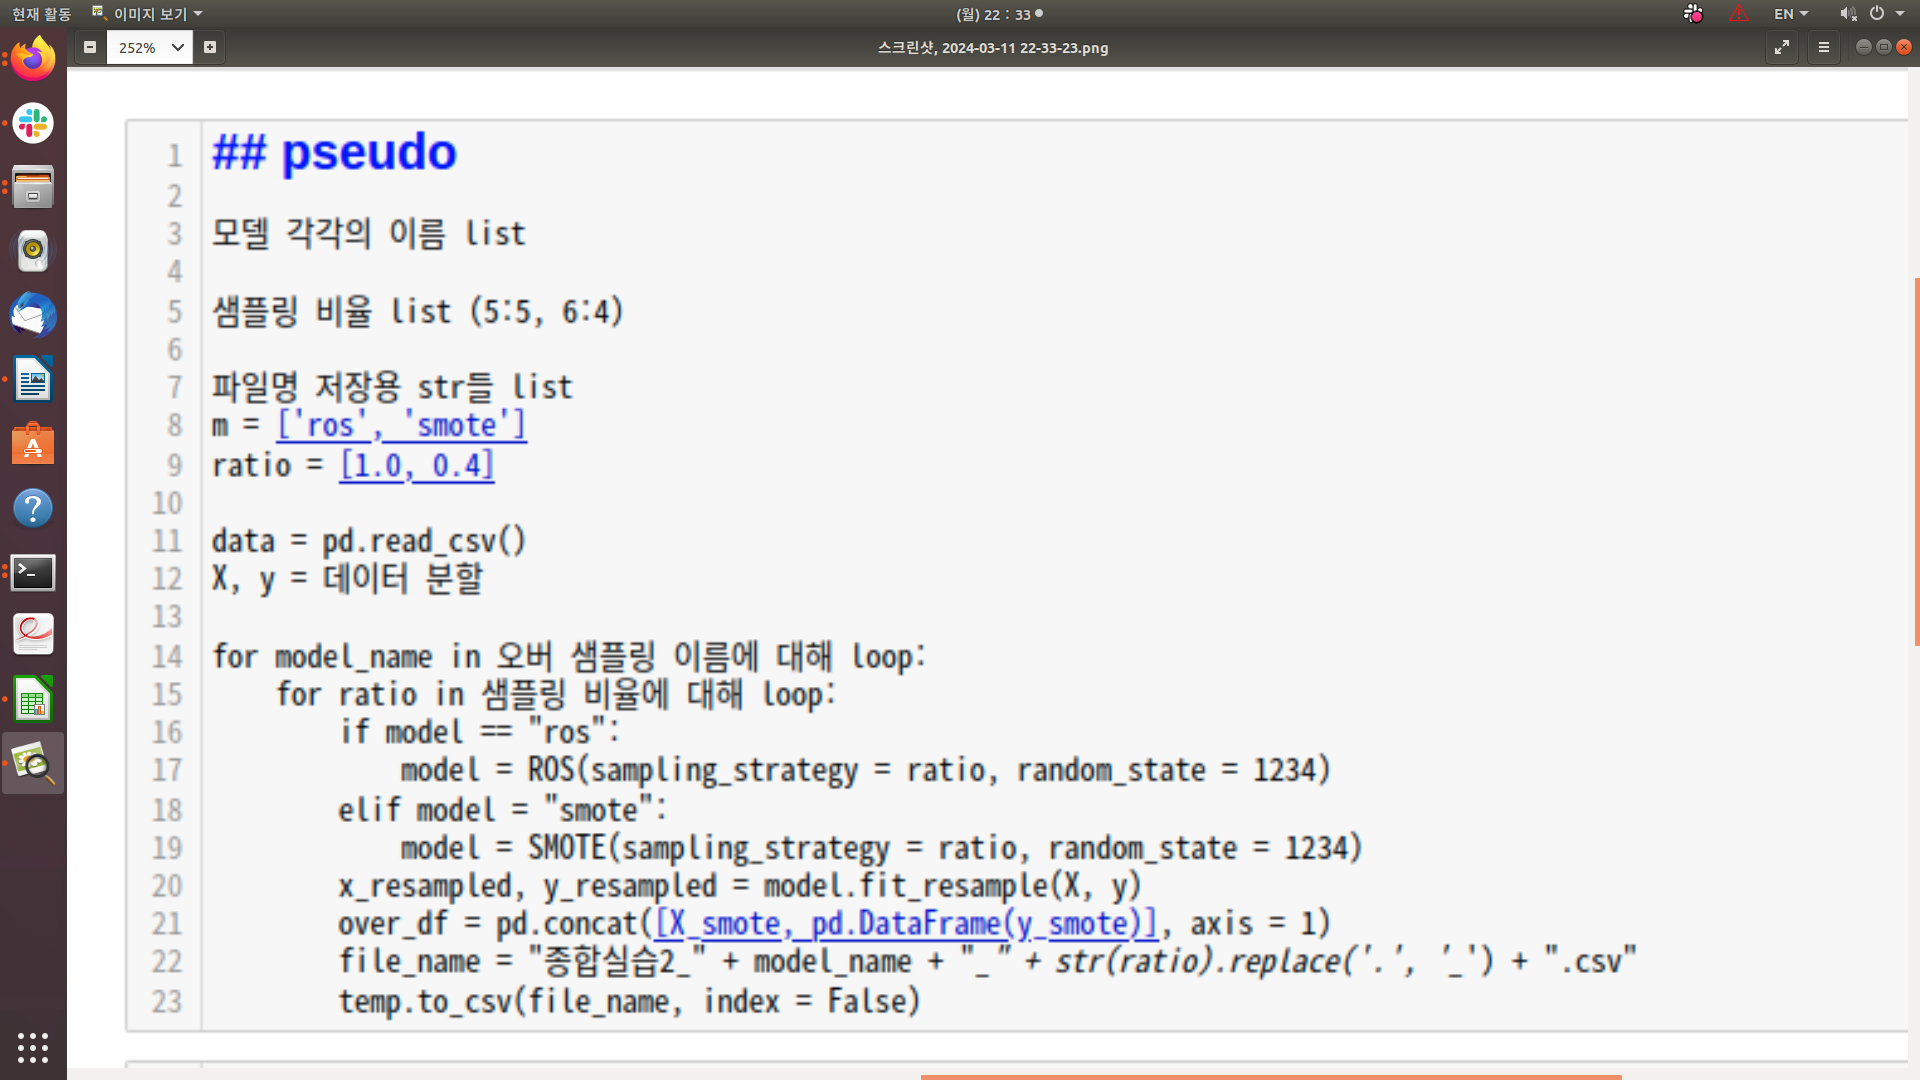

In [83]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [84]:
df = pd.read_csv("종합실습2_전처리만.csv")

# over sampling 전 목표변수 분포 확인
print(df['scale'].value_counts())
print("[비율] 양품:불량품\n {0:.1f}:{1:.1f}".format(len(df[df['scale'] == 0]) / len(df['scale']), len(df[df['scale'] == 1]) / len(df['scale'])) )

0    690
1    310
Name: scale, dtype: int64
[비율] 양품:불량품
 0.7:0.3


In [85]:
# over sampling models & ratios
models = ['ros', 'smote']
ratio = [1.0, 0.8]
var = ["o", "x"]

for m in models:
    for r in ratio:
        for v in var:
            if m == "ros":
                model = RandomOverSampler(sampling_strategy = r, random_state = 1234)
            elif model == "smote":
                m = SMOTE(sampling_strategy = r, random_state = 1234)
            
            X, y = df.drop(['scale'], axis = 1), df['scale']
                
            x_resampled, y_resampled = model.fit_resample(X, y)
            over_df = pd.concat([x_resampled, pd.DataFrame(y_resampled)], axis = 1)
            
            
            if v == "o":
                ## 파생변수 코드
                # spec_group
                spec_long = over_df['spec_long'].unique().tolist()
                for spec in spec_long:
                    normal_ratio = len(over_df[(over_df['spec_long']==spec) & (over_df['scale']== 0)]) / len(over_df[over_df['spec_long']== spec])
                    abnormal_ratio = len(over_df[(over_df['spec_long']==spec) & (over_df['scale']== 1)]) / len(over_df[over_df['spec_long']== spec])
                    percent = normal_ratio - abnormal_ratio
                    
                    if percent > 0.4:
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 1
                    elif percent > -0.4 :
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 2
                    else:
                        over_df.loc[over_df['spec_long']==spec, 'spec_group'] = 3
                    
                
                over_df = over_df.drop('spec_long', axis = 1)
                    
                # volume
                over_df['volume'] = over_df['pt_thick']*over_df['pt_width']*over_df['pt_length']
                file_name = "종합실습2_" + m + str(r).replace('.', '') + "_" + v + ".csv"
                
                    
            
            file_name = "종합실습2_" + m + str(r).replace('.', '') + "_" + v + ".csv"
            over_df.to_csv(file_name, index = False) 

In [ ]:
# Oversampling 후

df = pd.read_csv("종합실습2_ros08_o.csv")
print(df['scale'].value_counts())
print("[비율] 양품:불량품\n {0:.1f}:{1:.1f}".format(len(df[df['scale'] == 0]) / len(df['scale']), len(df[df['scale'] == 1]) / len(df['scale'])) )

In [ ]:
df.info()

In [69]:
# Oversampling 후

df = pd.read_csv("종합실습2_ros10_x.csv")
print(df['scale'].value_counts())
print("[비율] 양품:불량품\n {0:.1f}:{1:.1f}".format(len(df[df['scale'] == 0]) / len(df['scale']), len(df[df['scale'] == 1]) / len(df['scale'])) )

0    465
1    465
Name: scale, dtype: int64
[비율] 양품:불량품
 0.5:0.5


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   spec_long        930 non-null    object 
 1   spec_country     930 non-null    object 
 2   steel_kind       930 non-null    object 
 3   pt_thick         930 non-null    int64  
 4   pt_width         930 non-null    int64  
 5   pt_length        930 non-null    int64  
 6   hsb              930 non-null    object 
 7   fur_no           930 non-null    object 
 8   fur_input_row    930 non-null    object 
 9   fur_heat_temp    930 non-null    int64  
 10  fur_heat_time    930 non-null    int64  
 11  fur_soak_temp    930 non-null    int64  
 12  fur_soak_time    930 non-null    int64  
 13  fur_total_time   930 non-null    int64  
 14  rolling_method   930 non-null    object 
 15  rolling_temp     930 non-null    float64
 16  descaling_count  930 non-null    int64  
 17  work_group      